In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf.db as db
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metricBundles as metricBundles
import healpy as hp
from rubin_sim.utils import haversine

In [2]:
#dbFile = 'baseline_nexp2_v1.7_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
#conn = db.OpsimDatabaseFBS(dbFile, defaultTable='SummaryAllProps')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

Healpix slicer using NSIDE=1024, approximate resolution 3.435486 arcminutes
Healpix slicer using NSIDE=1024, approximate resolution 3.435486 arcminutes
Healpix slicer using NSIDE=1024, approximate resolution 3.435486 arcminutes
Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


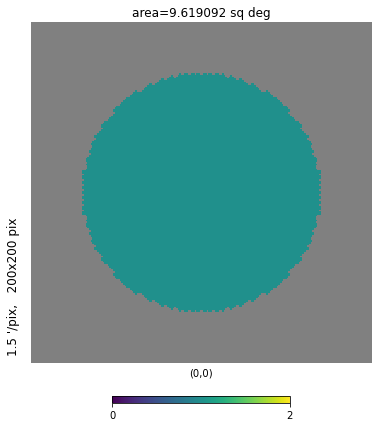

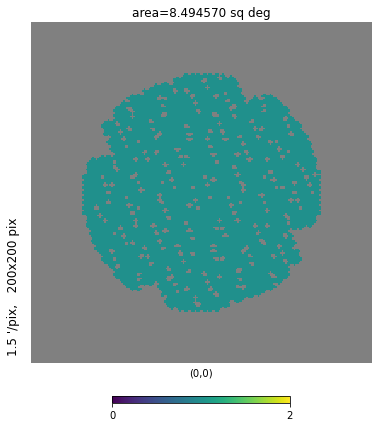

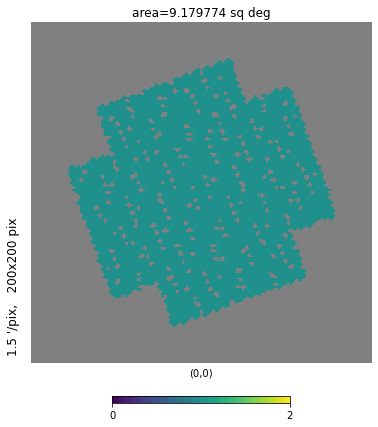

In [4]:
nside = 1024
slicer_list = []
slicer_list.append(slicers.HealpixSlicer(nside=nside, useCamera=False, radius=1.75, useCache=False))
slicer_list.append(slicers.HealpixSlicer(nside=nside, useCamera=True, radius=1.75, useCache=False))
slicer_list.append(slicers.HealpixSlicer(nside=nside, useCamera=True, useCache=False))


for slicer in slicer_list:
    names = ['fieldRA', 'fieldDec', 'rotSkyPos', 'observationStartMJD']
    types = [float]*4
    npts = 180
    data = np.zeros(npts, dtype=list(zip(names,types)))
    data['rotSkyPos'] = np.arange(0,npts*2,2)
    deltaMJD = 34.*npts/3600./24.
    expMJD_0 = 57000.
    data['observationStartMJD'] = expMJD_0+np.arange(0,deltaMJD, 34./3600./24.)

    outDir = 'temp'
    resultsDb = db.ResultsDb(outDir=outDir)
    metric = metrics.CountMetric(col='fieldRA')
    bundle = metricBundles.MetricBundle(metric,slicer,'')
    bg = metricBundles.MetricBundleGroup({1:bundle},None,  outDir=outDir, resultsDb=resultsDb)
    bg.setCurrent('')
    bg.runCurrent('',simData=data[10:11])
    bundle.metricValues.data[np.where(bundle.metricValues.mask == True)] = hp.UNSEEN

    pix_area = hp.nside2pixarea(nside, degrees=True)
    area = np.size(np.where(bundle.metricValues.data > 0)[0])*pix_area


    hp.gnomview(bundle.metricValues.data, title='area=%f sq deg' % area)
